In [41]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.append('../../../src/')

In [162]:
import numpy as np
from PIL import Image

In [42]:
import matplotlib.pyplot as plt

In [184]:
from models.chen2017.transforms import *
import datasets.divahisdb as diva
import experiment.data as exd

In [185]:
env = exd.Environment()

In [186]:
diva_dataset = diva.HisDBDataset(env.dataset('DIVA-HisDB'),gt=True)

In [220]:
dataset = diva.Processed(env.dataset('DIVA_Chen2017_processed'))
dataset[1]

(PosixPath('/media/jakob/bigdata/datasets/DIVA_Chen2017_processed/CB55/img/training/e-codices_fmb-cb-0055_0008v_max.jpg'),
 PosixPath('/media/jakob/bigdata/datasets/DIVA_Chen2017_processed/CB55/img/training/e-codices_fmb-cb-0055_0008v_max.slic.npy'),
 PosixPath('/media/jakob/bigdata/datasets/DIVA_Chen2017_processed/CB55/img/training/e-codices_fmb-cb-0055_0008v_max.tiles.npy'),
 PosixPath('/media/jakob/bigdata/datasets/DIVA_Chen2017_processed/CB55/img/training/e-codices_fmb-cb-0055_0008v_max.meta.npy'),
 PosixPath('/media/jakob/bigdata/datasets/DIVA_Chen2017_processed/CB55/img/training/e-codices_fmb-cb-0055_0008v_max.patchgt.npy'))

In [233]:
img = Image.open(str(dataset[0][0]))
tiles = np.load(dataset[0][2])
y = np.load(dataset[0][-1])

In [232]:
np.unique(y)
# np.histogram(y,bins=range(4))
np.histogram(y)

(array([2271,    0,    0,   12,    0,    0,   56,    0,    0,   89]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]))

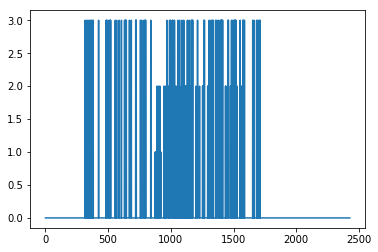

In [231]:
plt.plot(y)

TypeError: Invalid dimensions for image data

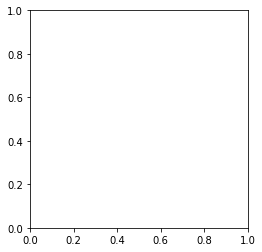

In [214]:
i = 800
plt.imshow(tiles[800])
y[i]

In [192]:
np.histogram(y,bins=range(4))

(array([2344,    6,   78]), array([0, 1, 2, 3]))

In [65]:
gt = diva_dataset[0][1]

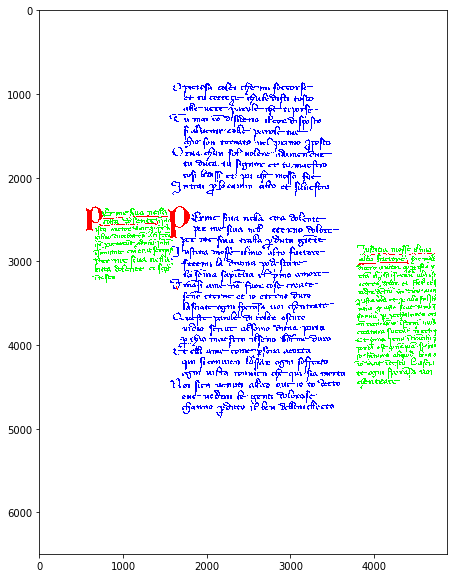

In [120]:
fig = plt.figure()
plt.imshow(diva.color_gt(gt))
fig.set_size_inches(10,10)

In [209]:
gt_labels = np.zeros((gt.shape[0], gt.shape[1]), dtype=np.ubyte)
gt_labels[gt == (diva.Annotations.BACKGROUND)] = 0
gt_labels[gt == (diva.Annotations.DECORATION)] = 1
gt_labels[gt == (diva.Annotations.DECORATION|diva.BOUNDARY)] = 1
gt_labels[gt == (diva.Annotations.COMMENT)]    = 2
gt_labels[gt == (diva.Annotations.COMMENT|diva.BOUNDARY)]    = 2
gt_labels[gt == (diva.Annotations.BODY_TEXT)] = 3
gt_labels[gt == (diva.Annotations.BODY_TEXT|diva.BOUNDARY)]  = 3

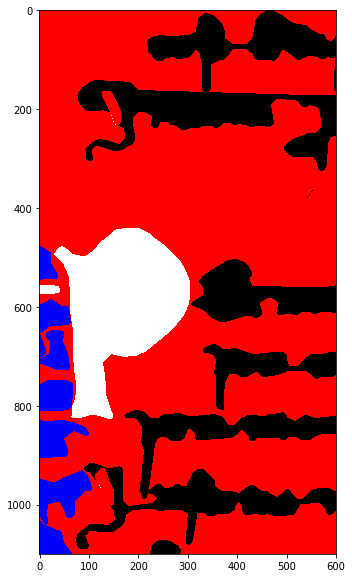

In [210]:
fig = plt.figure()
plt.imshow(gt_labels[1900:3000:,1500:2100:], cmap='flag')
fig.set_size_inches(10,10)

In [112]:
gt_labels[(gt & (diva.Annotations.BODY_TEXT| diva.Annotations.DECORATION)).astype(bool)] = 1

In [115]:
gt_labels[(gt & (diva.Annotations.BODY_TEXT| diva.Annotations.DECORATION)).astype(bool)]

(2745350,)

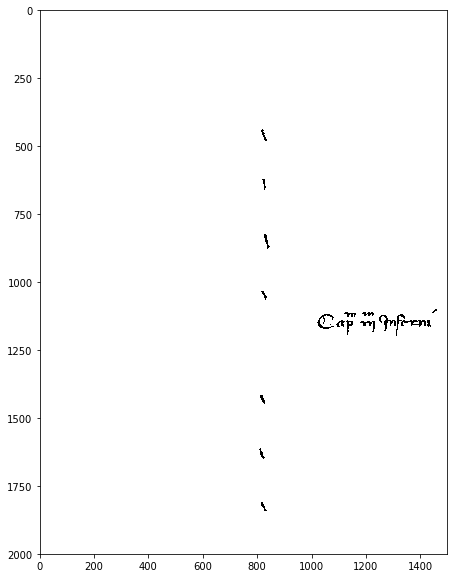

In [124]:
fig = plt.figure()
plt.imshow((gt == (diva.Annotations.BODY_TEXT|diva.Annotations.DECORATION)).astype(bool)[:4000:2,:3000:2], cmap='binary')
fig.set_size_inches(10,10)

In [176]:
img = Image.fromarray(gt_labels[900:1500:,1500:2100:])
img = img.resize((100,100))

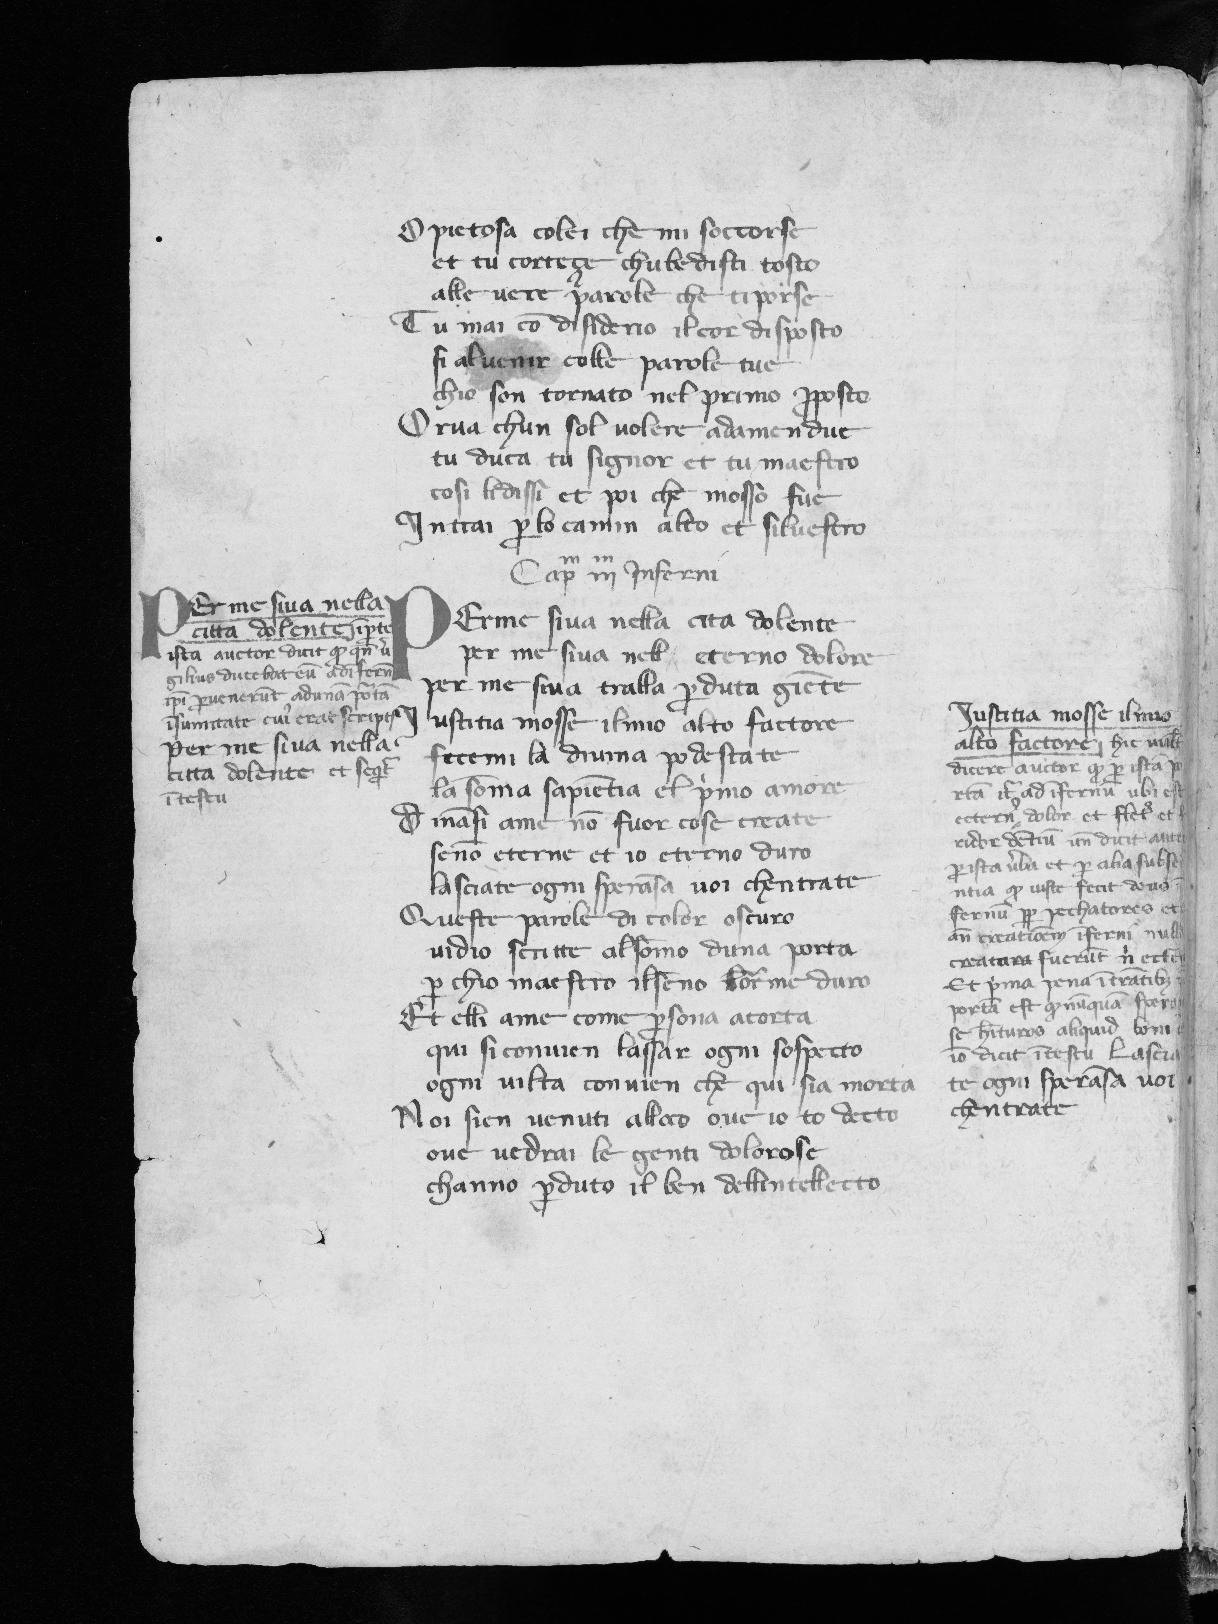

In [235]:
img.convert('L')